# Practical Statistics for Data Scientists (Python)
# Chapter 2. Data and Sampling Distributions
> (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck

Import required Python packages.

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [3]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

Figure 2.1

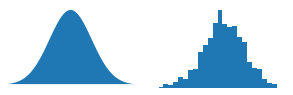

In [4]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

# Sampling Distribution of a Statistic

The term sampling distribution of a statistic refers to the distribution of some sample statistic, over many
samples drawn from the same population. Much of classical statistics is concerned with making
inferences from (small) samples to (very large) populations.

Typically, a sample is drawn with the goal of measuring something (with a sample statistic) or modeling
something (with a statistical or machine learning model). Since our estimate or model is based on a
sample, it might be in error; it might be different if we were to draw a different sample. We are therefore
interested in how different it might be — a key concern is sampling variability. If we had lots of data, we
could draw additional samples and observe the distribution of a sample statistic directly. Typically, we
will calculate our estimate or model using as much data as is easily available, so the option of drawing
additional samples from the population is not readily available.

The distribution of a sample statistic such as the mean is likely to be more regular and bell-shaped than
the distribution of the data itself. The larger the sample that the statistic is based on, the more this is true.
Also, the larger the sample, the narrower the distribution of the sample statistic.

In [5]:
loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data


This is illustrated in an example using annual income for loan applicants to Lending Club (see “A Small
Example: Predicting Loan Default” for a description of the data). Take three samples from this data: a
sample of 1,000 values, a sample of 1,000 means of 5 values, and a sample of 1,000 means of 20 values.
Then plot a histogram of each sample to produce Figure 2-6.

The histogram of the individual data values is broadly spread out and skewed toward higher values as is
to be expected with income data. The histograms of the means of 5 and 20 are increasingly compact and
more bell-shaped.

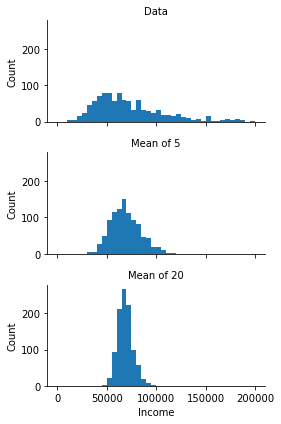

In [6]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

# The Bootstrap

One easy and effective way to estimate the sampling distribution of a statistic, or of model parameters, is
to draw additional samples, with replacement, from the sample itself and recalculate the statistic or
model for each resample. This procedure is called the bootstrap, and it does not necessarily involve any
assumptions about the data or the sample statistic being normally distributed.

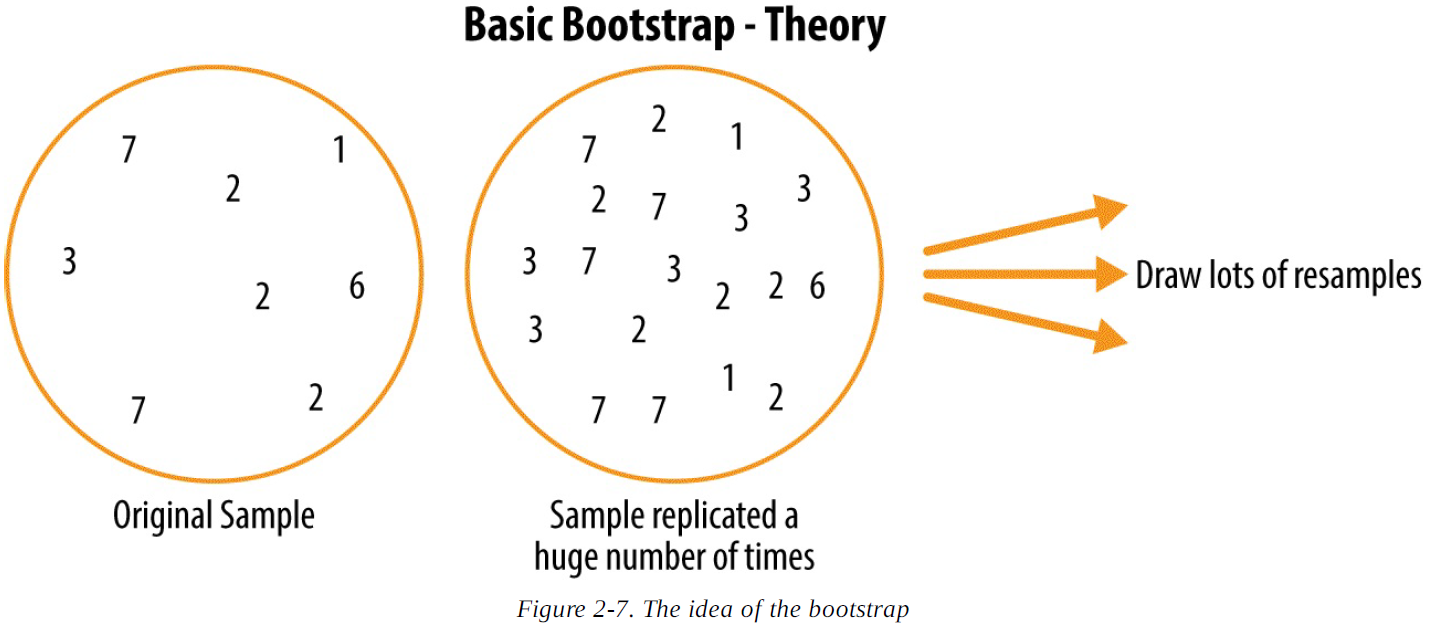

The algorithm for a bootstrap resampling of the mean is as follows, for a sample of size n:

1. Draw a sample value, record, replace it.
2. Repeat n times.
3. Record the mean of the n resampled values.
4. Repeat steps 1–3 R times.

5. Use the R results to:
6. Calculate their standard deviation (this estimates sample mean standard error).
7. Produce a histogram or boxplot.
8. Find a confidence interval.

For example, the following applies the
bootstrap to the incomes of people taking out loans:

In [8]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -84.36899999999878
std. error: 237.39568772736925


The original estimate of the median. The bootstrap distribution indicates that the estimate has a
bias and a standard error.

# Confidence Intervals

Frequency tables, histograms, boxplots, and standard errors are all ways to understand the potential error
in a sample estimate. Confidence intervals are another.


68760.51844
55734.1


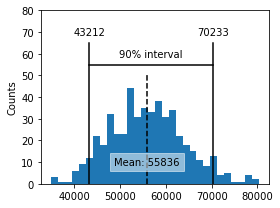

In [10]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

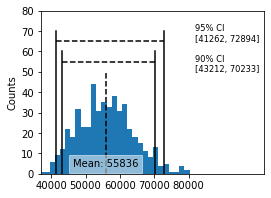

In [11]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

# Normal Distribution

In a normal distribution (Figure 2-10), 68% of the data lies within one standard deviation of the mean,
and 95% lies within two standard deviations.

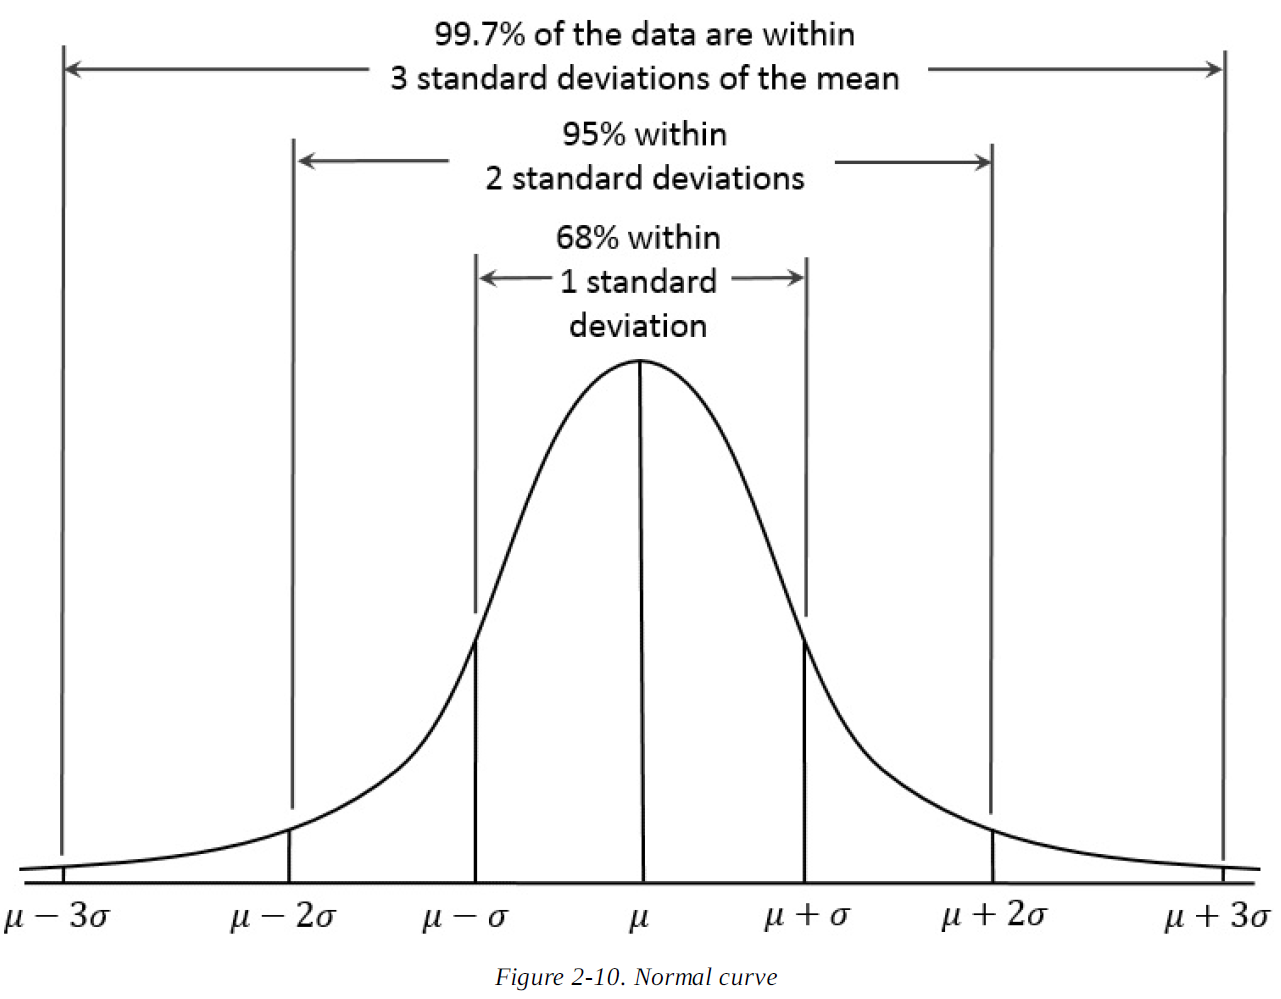

## Standard Normal and QQ-Plots
The package _scipy_ has the function (`scipy.stats.probplot`) to create QQ-plots. The argument `dist` specifies the distribution, which is set by default to the normal distribution.

A standard normal distribution is one in which the units on the x-axis are expressed in terms of standard
deviations away from the mean. To compare data to a standard normal distribution, you subtract the mean
then divide by the standard deviation; this is also called normalization or standardization (see
“Standardization (Normalization, Z-Scores)”). Note that “standardization” in this sense is unrelated to
database record standardization (conversion to a common format). The transformed value is termed a zscore,
and the normal distribution is sometimes called the z-distribution.

A QQ-Plot is used to visually determine how close a sample is to the normal distribution. The QQ-Plot
orders the z-scores from low to high, and plots each value’s z-score on the y-axis; the x-axis is the
corresponding quantile of a normal distribution for that value’s rank. Since the data is normalized, the
units correspond to the number of standard deviations away of the data from the mean. If the points
roughly fall on the diagonal line, then the sample distribution can be considered close to normal. Figure 2-
11 shows a QQ-Plot for a sample of 100 values randomly generated from a normal distribution; as
expected, the points closely follow the line.

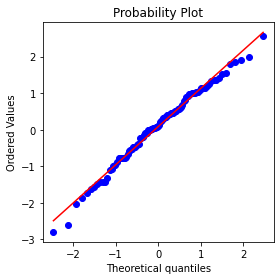

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

# Long-Tailed Distributions

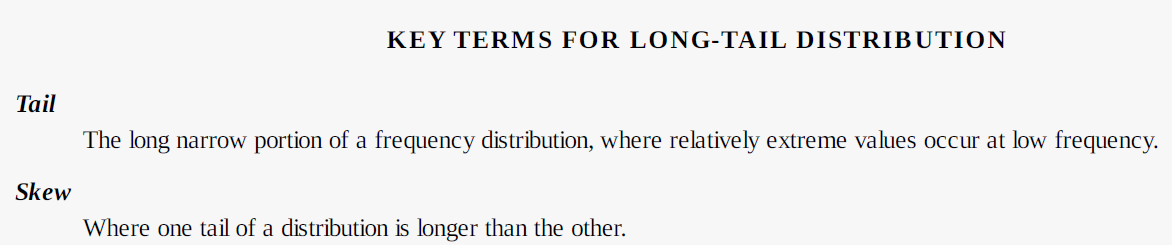

While the normal distribution is often appropriate and useful with respect to the distribution of errors and
sample statistics, it typically does not characterize the distribution of raw data. Sometimes, the
distribution is highly skewed (asymmetric), such as with income data, or the distribution can be discrete,
as with binomial data. Both symmetric and asymmetric distributions may have long tails. The tails of a
distribution correspond to the extreme values (small and large). Long tails, and guarding against them, are
widely recognized in practical work.

A good example to illustrate the long-tailed nature of data is stock returns. Figure 2-12 shows the QQ-Plot
for the daily stock returns for Netflix (NFLX).

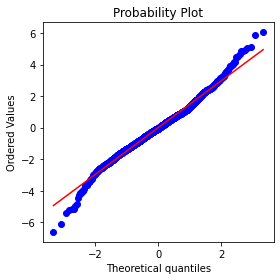

In [11]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

In contrast to Figure 2-11, the points are far below the line for low values and far above the line for high
values. This means that we are much more likely to observe extreme values than would be expected if the
data had a normal distribution. Figure 2-12 shows another common phenomena: the points are close to the
line for the data within one standard deviation of the mean. Tukey refers to this phenomenon as data being
“normal in the middle,” but having much longer tails (see [Tukey-1987]).

# Binomial Distribution

The binomial distribution is the frequency distribution of the number of successes (x) in a given number of
trials (n) with specified probability (p) of success in each trial. There is a family of binomial
distributions, depending on the values of x, n, and p.



In [13]:
print(stats.binom.pmf(2, n=5, p=0.1))

0.0729


In [14]:
print(stats.binom.cdf(2, n=5, p=0.1))

0.99144


# Poisson and Related Distribution
## Poisson Distributions

From prior data we can estimate the average number of events per unit of time or space, but we might also
want to know how different this might be from one unit of time/space to another. The Poisson distribution
tells us the distribution of events per unit of time or space when we sample many such units.



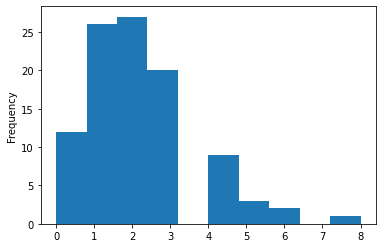

In [15]:
sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

## Exponential Distribution

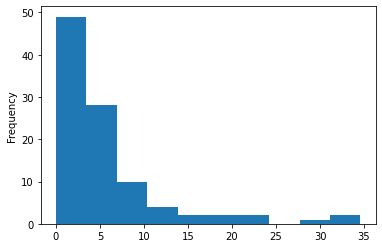

In [15]:
sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()
plt.show()

##  Weibull Distribution

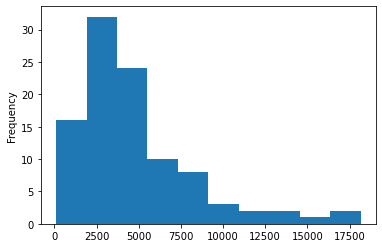

In [16]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()